In [130]:
# Importing all necessaary libraries

import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import warnings


import matplotlib.pyplot as plt

In [9]:
# Importing the dataset from excel file

excelfile=pd.ExcelFile("Customer Ageing.xlsx")

Customer=pd.read_excel(excelfile,'Ageing Analysis')  # Sheet 1
Geography=pd.read_excel(excelfile,'Geography')    # Sheet 3

In [10]:
Customer.tail()

,TXNumber,Equipment,Customer,Area,Monthly Rate,Payment Date,Status,Active,Net Revenue,Deduction
66,TIN67,Equipment 7,Customer 2,Area 3,50000,2020-08-30,Paid,23,38333.333333,3833.333333
67,TIN68,Equipment 3,Customer 3,Area 1,60000,2020-08-30,Paid,22,44000.000000,4400.000000
68,TIN69,Equipment 6,Customer 4,Area 3,50000,2020-08-30,UnPaid,4,6666.666667,666.666667
69,TIN70,Equipment 5,Customer 5,Area 3,60000,2020-08-30,UnPaid,23,46000.000000,4600.000000
70,TIN71,Equipment 6,Customer 1,Area 1,70000,2020-08-30,UnPaid,15,35000.000000,3500.000000


In [11]:
Geography.head()

,Area,Area Name
0,Area 1,Chennai
1,Area 2,Bangalore
2,Area 3,Hydrabad


#### AUGMENT DATA WITH ADDITIONAL COLUMN

#### Add Profit Column

In [219]:
# Adding Profit Column by substracting the Net Revenue from Deductions

Customer['Profit'] = Customer['Net Revenue']-Customer['Deduction']

Customer.head()

,TXNumber,Equipment,Customer,Area,Monthly Rate,Payment Date,Status,Active,Net Revenue,Deduction,Profit,month,Current Date,Area Name
0,TIN1,Equipment 1,Customer 1,Area 1,50000,2020-01-31,Paid,18,30000.0,3000.0,27000.0,1,2021-05-30 03:42:10.195446,Chennai
1,TIN2,Equipment 2,Customer 2,Area 2,60000,2020-01-31,Unpaid,19,38000.0,3800.0,34200.0,1,2021-05-30 03:42:10.195446,Bangalore
2,TIN3,Equipment 6,Customer 3,Area 3,50000,2020-01-31,Paid,15,25000.0,2500.0,22500.0,1,2021-05-30 03:42:10.195446,Hydrabad
3,TIN4,Equipment 3,Customer 4,Area 3,60000,2020-01-31,Unpaid,17,34000.0,3400.0,30600.0,1,2021-05-30 03:42:10.195446,Hydrabad
4,TIN5,Equipment 4,Customer 5,Area 1,50000,2020-01-31,Paid,21,35000.0,3500.0,31500.0,1,2021-05-30 03:42:10.195446,Chennai


#### Add Month Column

In [220]:
#I created month column so far to analysis the company's perfomance on a monthly basis

Customer['month'] = Customer['Payment Date'].dt.month

Customer.head()

,TXNumber,Equipment,Customer,Area,Monthly Rate,Payment Date,Status,Active,Net Revenue,Deduction,Profit,month,Current Date,Area Name
0,TIN1,Equipment 1,Customer 1,Area 1,50000,2020-01-31,Paid,18,30000.0,3000.0,27000.0,1,2021-05-30 03:42:10.195446,Chennai
1,TIN2,Equipment 2,Customer 2,Area 2,60000,2020-01-31,Unpaid,19,38000.0,3800.0,34200.0,1,2021-05-30 03:42:10.195446,Bangalore
2,TIN3,Equipment 6,Customer 3,Area 3,50000,2020-01-31,Paid,15,25000.0,2500.0,22500.0,1,2021-05-30 03:42:10.195446,Hydrabad
3,TIN4,Equipment 3,Customer 4,Area 3,60000,2020-01-31,Unpaid,17,34000.0,3400.0,30600.0,1,2021-05-30 03:42:10.195446,Hydrabad
4,TIN5,Equipment 4,Customer 5,Area 1,50000,2020-01-31,Paid,21,35000.0,3500.0,31500.0,1,2021-05-30 03:42:10.195446,Chennai


#### Add Current Date

In [14]:
import datetime

Customer['Current Date'] = datetime.datetime.now()

Customer.head()

,TXNumber,Equipment,Customer,Area,Monthly Rate,Payment Date,Status,Active,Net Revenue,Deduction,Profit,month,Current Date
0,TIN1,Equipment 1,Customer 1,Area 1,50000,2020-01-31,Paid,18,30000.0,3000.0,27000.0,1,2021-05-30 03:42:10.195446
1,TIN2,Equipment 2,Customer 2,Area 2,60000,2020-01-31,Unpaid,19,38000.0,3800.0,34200.0,1,2021-05-30 03:42:10.195446
2,TIN3,Equipment 6,Customer 3,Area 3,50000,2020-01-31,Paid,15,25000.0,2500.0,22500.0,1,2021-05-30 03:42:10.195446
3,TIN4,Equipment 3,Customer 4,Area 3,60000,2020-01-31,Unpaid,17,34000.0,3400.0,30600.0,1,2021-05-30 03:42:10.195446
4,TIN5,Equipment 4,Customer 5,Area 1,50000,2020-01-31,Paid,21,35000.0,3500.0,31500.0,1,2021-05-30 03:42:10.195446


#### Monthly Revenue & Profit

In [15]:
result=Customer.groupby('month').sum()

result

,Monthly Rate,Active,Net Revenue,Deduction,Profit
month,,,,,
1,550000,183,340000.000000,34000.000000,306000.0
2,420000,117,229666.666667,22966.666667,206700.0
3,760000,250,484333.333333,48433.333333,435900.0
4,580000,202,391000.000000,39100.000000,351900.0
5,560000,208,387000.000000,38700.000000,348300.0
6,450000,152,286333.333333,28633.333333,257700.0
7,460000,143,276000.000000,27600.000000,248400.0
8,290000,87,170000.000000,17000.000000,153000.0


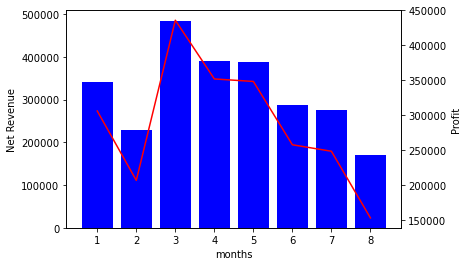

In [221]:
#Plotting the above result for easily understanding of the financial information. The month with the highest Revenue & Profit is March

result= Customer.groupby('month').sum()
fig, ax1 = plt.subplots()

months = range(1, 9)

ax2 = ax1.twinx()
ax1.bar(months, result['Net Revenue'], color='b')
ax2.plot(months, result['Profit'], color='r')

ax1.set_xlabel('months')
ax1.set_ylabel('Net Revenue')
ax2.set_ylabel('Profit')


plt.show()

#### Revenue & Profit from Each Area

#### Add Area Name To Each Row

In [222]:
# I decided to add Area Name column so as to be able to analyse the company's performance base on location

area_dictionary ={'Area 1' : 'Chennai', 'Area 2' : 'Bangalore', 'Area 3' : 'Hydrabad'}

Customer['Area Name'] = Customer['Area'].map(area_dictionary)

Customer.head()

,TXNumber,Equipment,Customer,Area,Monthly Rate,Payment Date,Status,Active,Net Revenue,Deduction,Profit,month,Current Date,Area Name
0,TIN1,Equipment 1,Customer 1,Area 1,50000,2020-01-31,Paid,18,30000.0,3000.0,27000.0,1,2021-05-30 03:42:10.195446,Chennai
1,TIN2,Equipment 2,Customer 2,Area 2,60000,2020-01-31,Unpaid,19,38000.0,3800.0,34200.0,1,2021-05-30 03:42:10.195446,Bangalore
2,TIN3,Equipment 6,Customer 3,Area 3,50000,2020-01-31,Paid,15,25000.0,2500.0,22500.0,1,2021-05-30 03:42:10.195446,Hydrabad
3,TIN4,Equipment 3,Customer 4,Area 3,60000,2020-01-31,Unpaid,17,34000.0,3400.0,30600.0,1,2021-05-30 03:42:10.195446,Hydrabad
4,TIN5,Equipment 4,Customer 5,Area 1,50000,2020-01-31,Paid,21,35000.0,3500.0,31500.0,1,2021-05-30 03:42:10.195446,Chennai


In [18]:
# Grouped the table by area to determine each area performance.

result=Customer.groupby('Area Name').sum()

result

,Monthly Rate,Active,Net Revenue,Deduction,Profit,month
Area Name,,,,,,
Bangalore,650000,221,4.306667e+05,43066.666667,387600.0,40
Chennai,1180000,363,7.100000e+05,71000.000000,639000.0,85
Hydrabad,2240000,758,1.423667e+06,142366.666667,1281300.0,172


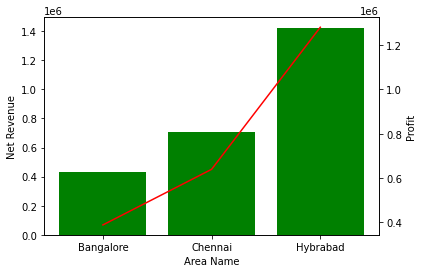

In [20]:
#Hydrabad is the Area is the highest revenue and profit.

result= Customer.groupby('Area Name').sum()

fig, ax1 = plt.subplots()

Area_Name= ('Bangalore', 'Chennai', 'Hybrabad')

ax2 = ax1.twinx()
ax1.bar(Area_Name, result['Net Revenue'], color='g')
ax2.plot(Area_Name, result['Profit'], color='r')

ax1.set_xlabel('Area Name')
ax1.set_ylabel('Net Revenue')
ax2.set_ylabel('Profit')


plt.show()

#### Debtor Age Analysis

In [21]:
# To analyse the debtors, we need to seperate the cash customers from customers who bought goods on credit, that's why I grouped the table by Unpaid

Debtors = Customer[Customer['Status'] == 'Unpaid']

Debtors.head(10)

,TXNumber,Equipment,Customer,Area,Monthly Rate,Payment Date,Status,Active,Net Revenue,Deduction,Profit,month,Current Date,Area Name
1,TIN2,Equipment 2,Customer 2,Area 2,60000,2020-01-31,Unpaid,19,38000.000000,3800.000000,34200.0,1,2021-05-30 03:42:10.195446,Bangalore
3,TIN4,Equipment 3,Customer 4,Area 3,60000,2020-01-31,Unpaid,17,34000.000000,3400.000000,30600.0,1,2021-05-30 03:42:10.195446,Hydrabad
9,TIN10,Equipment 5,Customer 5,Area 3,60000,2020-01-31,Unpaid,23,46000.000000,4600.000000,41400.0,1,2021-05-30 03:42:10.195446,Hydrabad
16,TIN17,Equipment 5,Customer 5,Area 2,60000,2020-02-29,Unpaid,18,36000.000000,3600.000000,32400.0,2,2021-05-30 03:42:10.195446,Bangalore
24,TIN25,Equipment 5,Customer 1,Area 3,70000,2020-03-31,Unpaid,24,56000.000000,5600.000000,50400.0,3,2021-05-30 03:42:10.195446,Hydrabad
27,TIN28,Equipment 3,Customer 4,Area 3,50000,2020-03-31,Unpaid,26,43333.333333,4333.333333,39000.0,3,2021-05-30 03:42:10.195446,Hydrabad
36,TIN37,Equipment 4,Customer 3,Area 2,60000,2020-04-30,Unpaid,26,52000.000000,5200.000000,46800.0,4,2021-05-30 03:42:10.195446,Bangalore
39,TIN40,Equipment 2,Customer 1,Area 1,70000,2020-04-30,Unpaid,16,37333.333333,3733.333333,33600.0,4,2021-05-30 03:42:10.195446,Chennai
45,TIN46,Equipment 5,Customer 1,Area 3,50000,2020-05-31,Unpaid,24,40000.000000,4000.000000,36000.0,5,2021-05-30 03:42:10.195446,Hydrabad
53,TIN54,Equipment 3,Customer 3,Area 1,60000,2020-06-30,Unpaid,22,44000.000000,4400.000000,39600.0,6,2021-05-30 03:42:10.195446,Chennai


In [33]:
Debt = pd.DataFrame(Debtors)

In [223]:
# Called up the relevant information needed for our analysis.

Outstandings = Debt.loc[:, ['Customer', 'Active', 'Net Revenue']]

Outstandings.head(5)

,Customer,Active,Net Revenue
1,Customer 2,19,38000.0
3,Customer 4,17,34000.0
9,Customer 5,23,46000.0
16,Customer 5,18,36000.0
24,Customer 1,24,56000.0


In [216]:
#Grouping the days of amount owed using Active column.

pd.cut(Outstandings.Active, bins=[0, 10, 20, 30], labels=["Performing", "Not Performing", "Bad"])

Outstandings.insert(3, 'Age Group', Age)

In [217]:
Outstandings.head()

,Customer,Active,Net Revenue,Age Group
1,Customer 2,19,38000.0,Not Performing
3,Customer 4,17,34000.0,Not Performing
9,Customer 5,23,46000.0,Bad
16,Customer 5,18,36000.0,Not Performing
24,Customer 1,24,56000.0,Bad


In [218]:
#Grouping to show the age bracket range.

area_dictionary ={'Performing' : '0-10days', 'Not Performing' : '11-20days', 'Bad' : '21-20days'}

Outstandings['Age Bracket'] = Outstandings['Age Group'].map(area_dictionary)

Outstandings.head()

,Customer,Active,Net Revenue,Age Group,Age Bracket
1,Customer 2,19,38000.0,Not Performing,11-20days
3,Customer 4,17,34000.0,Not Performing,11-20days
9,Customer 5,23,46000.0,Bad,21-20days
16,Customer 5,18,36000.0,Not Performing,11-20days
24,Customer 1,24,56000.0,Bad,21-20days
